In [1]:
import pandas as pd

In [2]:
#read the file
df = pd.read_csv('NHANES_age_prediction.csv')
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [3]:
#drop the ID column since it would be irrelevant for our objective
df = df.drop('SEQN', axis=1)
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# Quiz Tasks

You are assigned to investigate through the NHANES dataset, which was created to assess the health and nutritional status of adults and children in the United States. 

The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to **predicting respondents' age** by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.

For more information on the column names of this dataset, refer to this link: 
https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

### Tasks:

**1. Data Acquisition and Preprocessing (10 points)**

* Import necessary libraries like pandas, scikit-learn (sklearn).
* Explore the data: identify missing values, data types, and potential outliers. Preprocess the data by handling missing values (e.g., imputation or removal), encoding categorical features (e.g., one-hot encoding), and feature scaling/normalization (using techniques covered in previous readings).
* Split the data into training and testing sets (80% training, 20% testing, random seed = 42) using `train_test_split` from sklearn.model_selection.

**2. Model Building and Evaluation (30 points)**

* **K-Nearest Neighbors (KNN):**
    * Implement a KNN model using `sklearn`.
    * Use an appropriate distance metric from `sklearn`'s distance metrics. 
    * Train the KNN model on the training data.
    * Experiment with different values of `k` (number of neighbors) and evaluate the model performance using cross-validation (5-fold CV) with cross validation function from `sklearn`. Choose the `k` that yields the best average accuracy.
* **Support Vector Machine (SVM):**
    * Implement an SVM model using `SVC` from `sklearn`.
    * Experiment with different kernel functions (e.g., linear, rbf) and regularization parameters (C) using a grid search approach with `GridSearchCV` from `sklearn`. Evaluate the model performance using cross-validation. Choose the combination of parameters that yields the best average accuracy.
* **Logistic Regression:**
    * Implement a Logistic Regression model using `LogisticRegression` from `sklearn`.
    * Train the model on the training data. 
    * Consider using L1 or L2 regularization with `penalty` parameter to prevent overfitting. Evaluate the model performance using cross-validation.

**3. Model Comparison and Hyperparameter Tuning (20 points)**

* Compare the performance of KNN, SVM, and Logistic Regression models using metrics like accuracy, precision, recall, and F1-score (obtained using `classification_report` from `sklearn`). 
* Discuss the strengths and weaknesses of each model in the context of this specific problem.
* Explain the purpose of hyperparameter tuning and its impact on model performance. Briefly discuss the difference between Grid Search and Random Search for hyperparameter optimization.

**4. Model Interpretation (20 points)**

* Evaluate the final, best-performing model on the testing set. 
* Analyze the model's predictions and discuss potential limitations.
* For the chosen model (e.g., SVM with best hyperparameters), interpret the coefficients (if applicable) to understand the features that have the most significant impact on predicting age groups.

**5. Report and Conclusion (20 points)**

* Create a comprehensive summary of your work. 
* Include sections for data exploration, model building (with code snippets), hyperparameter tuning, model evaluation, and interpretation. 
* Discuss the overall findings, including the best performing model and insights gained from the project. 

**Connecting Statistical Concepts:**

* Briefly explain how distance metrics relate to the concept of similarity between data points. 
* Discuss the role of regularization (L1/L2 penalty) in Logistic Regression from a statistical perspective (e.g., reducing variance, model complexity).

**Deliverables:**

* Jupyter Notebook with well-documented code for all steps mentioned above.

**NOTE:** Take this as a classification problem and use the `age_group` as your target column. Hence, one of the steps would be to drop the `RIDAGEYR` column since this is just the numerical equivalent of our target column. Do this after exploring the dataset.

# 1. Data Acquisition and Preprocessing

In [4]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

### Age group seems to be a string of adult and senior. Let's do one-hot-encoding so to convert to int.

Where isSenior
<ul>
    <li>0 = Adult
    <li>1 = Senior
</ul>

There also doesn't seem to be any missing values.

In [5]:
df = df.drop(labels=['RIDAGEYR'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age_group  2278 non-null   object 
 1   RIAGENDR   2278 non-null   float64
 2   PAQ605     2278 non-null   float64
 3   BMXBMI     2278 non-null   float64
 4   LBXGLU     2278 non-null   float64
 5   DIQ010     2278 non-null   float64
 6   LBXGLT     2278 non-null   float64
 7   LBXIN      2278 non-null   float64
dtypes: float64(7), object(1)
memory usage: 142.5+ KB


In [6]:
df.age_group.value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [7]:
df['isSenior'] = df.age_group.apply(lambda x : 1 if x == "Senior" else 0)
df['isSenior'].value_counts()

isSenior
0    1914
1     364
Name: count, dtype: int64

### Our features seem to have low possibilites for multicollinearity.

<Axes: >

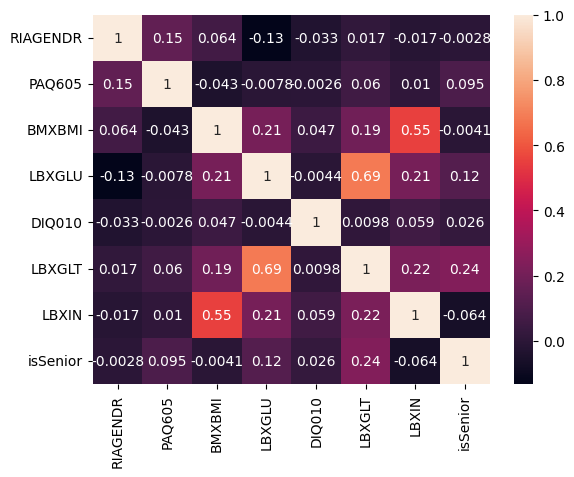

In [8]:
feautureCorr = df.drop('age_group', axis=1).corr()

sns.heatmap(feautureCorr, annot=True)

In [9]:
X = df.drop(labels=['age_group', 'isSenior'], axis=1)
y = df['isSenior']

### Our features are shown to greatly vary in range. with some values being in single digits while others in triple digits. Their std is also whack from 0.18 to 114.

We need to perform feature scaling

In [10]:
X.describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [11]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(X)
scaledX = pd.DataFrame(scaledData, columns=X.columns)

In [12]:
scaledX.describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2.278000e+03,2.278000e+03,2.278000e+03,2.278000e+03,2.278000e+03,2.278000e+03,2.278000e+03
mean,-1.629757e-16,-7.797879e-17,1.933874e-16,1.754523e-16,2.978790e-16,4.600749e-17,-6.862134e-17
std,1.000220e+00,1.000220e+00,1.000220e+00,1.000220e+00,1.000220e+00,1.000220e+00,1.000220e+00
min,-1.023094e+00,-2.062661e+00,-1.856560e+00,-2.043683e+00,-5.477959e+00,-1.593570e+00,-1.203579e+00
25%,-1.023094e+00,4.446719e-01,-7.113173e-01,-4.782043e-01,-8.755269e-02,-5.946523e-01,-6.149009e-01
50%,9.774276e-01,4.446719e-01,-1.593930e-01,-1.427446e-01,-8.755269e-02,-2.120879e-01,-2.876285e-01
75%,9.774276e-01,4.446719e-01,4.477238e-01,2.486250e-01,-8.755269e-02,3.192515e-01,2.681170e-01
max,9.774276e-01,1.298134e+01,5.815188e+00,1.707752e+01,5.302854e+00,1.039345e+01,9.309273e+00


In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=1, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1822, 7)
(456, 7)
(1822,)
(456,)


# 2. Model Building and Evaluation
### KNN

In [14]:
from sklearn.model_selection import KFold, cross_val_score

In [15]:
k_res = []

for k in range(1,10):
    knn_Clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    
    cv = KFold(n_splits=10)
    a_score = cross_val_score(knn_Clf, X_train, y_train, scoring='accuracy', cv=cv).mean()
    p_score = cross_val_score(knn_Clf, X_train, y_train, scoring='precision', cv=cv).mean()
    r_score = cross_val_score(knn_Clf, X_train, y_train, scoring='recall', cv=cv).mean()
    f1_score = cross_val_score(knn_Clf, X_train, y_train, scoring='f1', cv=cv).mean()
    k_res.append([k, a_score, p_score, r_score, f1_score])

k_res = pd.DataFrame(k_res, columns=['k', 'accuracy', 'precision', 'recall', 'f1'])

### Knn with eight neighbors seems to give the best accuracy results

In [16]:
k_res[k_res['accuracy'] == k_res['accuracy'].max()]

,k,accuracy,precision,recall,f1
7,8,0.850138,0.606519,0.178774,0.272192


In [34]:
knn_Clf = KNeighborsClassifier(n_neighbors=8)
knn_Clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

# Support Vector Machine (SVM):

Implement an SVM model using SVC from sklearn.
Experiment with different kernel functions (e.g., linear, rbf) and regularization parameters (C) using a grid search approach with GridSearchCV from sklearn. Evaluate the model performance using cross-validation. Choose the combination of parameters that yields the best average accuracy.


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

In [73]:
param_grid = {
    'C' : [0.1, 0.001, 0.0001, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.001, 0.0001, 10, 100, 1000],
    # 'kernel' : ['linear', 'rbf']
}

scorers = {
    'accuracy_score' : make_scorer(accuracy_score)
}

clf_grid = GridSearchCV(SVC(kernel='rbf'), scoring=scorers, param_grid=param_grid, refit='accuracy_score')
clf_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 10, 100, 1000]},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict')})

In [75]:
clf_grid.cv_results_

{'mean_fit_time': array([0.04788008, 0.03630266, 0.02473655, 0.02392654, 0.07878404,
        0.13363872, 0.14701347, 0.02414646, 0.0231462 , 0.02335348,
        0.02254133, 0.02354178, 0.03929944, 0.06582303, 0.02375455,
        0.02354264, 0.02295938, 0.02454081, 0.02313485, 0.04148331,
        0.04589081, 0.0742238 , 0.06721931, 0.0428864 , 0.03390551,
        0.09873977, 0.15421896, 0.16894627, 0.12826414, 0.15596399,
        0.08995938, 0.06023507, 0.08895059, 0.1470274 , 0.16695256,
        0.38637218, 0.76872659, 0.31435933, 0.17432475, 0.08855252,
        0.14721389, 0.16496201]),
 'std_fit_time': array([3.58656457e-03, 1.49239361e-03, 3.93181011e-04, 6.31673536e-04,
        5.41394050e-03, 1.09245370e-03, 1.35516021e-03, 7.40870236e-04,
        3.95226167e-04, 4.96862502e-04, 7.95264481e-04, 8.00856214e-04,
        4.80069823e-04, 1.79741141e-03, 7.29202083e-04, 7.98275293e-04,
        1.71420140e-05, 2.85639126e-03, 4.00262734e-04, 6.20133291e-03,
        2.07353658e-03, 6.878

# Logistic Regression:
Implement a Logistic Regression model using LogisticRegression from sklearn.
Train the model on the training data.
Consider using L1 or L2 regularization with penalty parameter to prevent overfitting. Evaluate the model performance using cross-validation.

In [59]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [66]:
l_res = []
penalty = ['l1', 'l2']

C_logs = []
p_logs = []
for C in [1, 10, 50, 100]:
    lr_Clf = None
    for p in penalty:
        if p == 'l2':
            lr_Clf = LogisticRegression(penalty=p, C=C, max_iter=500)
        else:
            lr_Clf = LogisticRegression(penalty=p, C=C, max_iter=500, solver='liblinear')
            
        cv = KFold(n_splits=10)
        a_score = cross_val_score(lr_Clf, X_train, y_train, scoring='accuracy', cv=cv).mean()
        p_score = cross_val_score(lr_Clf, X_train, y_train, scoring='precision', cv=cv).mean()
        r_score = cross_val_score(lr_Clf, X_train, y_train, scoring='recall', cv=cv).mean()
        f1_score = cross_val_score(lr_Clf, X_train, y_train, scoring='f1', cv=cv).mean()

        C_logs.append(C)
        p_logs.append(p)
        l_res.append([a_score, p_score, r_score, f1_score])

l_res = pd.DataFrame(k_res, columns=['accuracy', 'precision', 'recall', 'f1'])
l_res['penalty'] = pd.Series(p_logs)
l_res['C'] = pd.Series(C_logs)

In [67]:
l_res

,accuracy,precision,recall,f1,penalty,C
0,0.779899,0.313451,0.316885,0.311998,l1,1.0
1,0.836426,0.462857,0.124551,0.193516,l2,1.0
2,0.822711,0.412373,0.241896,0.297687,l1,10.0
3,0.840269,0.489962,0.149006,0.222483,l2,10.0
4,0.839170,0.498528,0.247416,0.323750,l1,50.0
5,0.844106,0.543387,0.164639,0.250959,l2,50.0
6,0.845746,0.530429,0.231980,0.316994,l1,100.0
7,0.850138,0.606519,0.178774,0.272192,l2,100.0
8,0.846280,0.538757,0.227803,0.316567,NaN,NaN


### Choose the highest f1

In [80]:
lr_Clf = LogisticRegression(C=100, penalty='l1',  max_iter=500, solver='liblinear')
lr_Clf.fit(X_train, y_train)
lr_Clf

LogisticRegression(C=100, max_iter=500, penalty='l1', solver='liblinear')

# Compare

In [85]:
y_Knn = knn_Clf.predict(X_test)
y_Lr = lr_Clf.predict(X_test)
y_Svm = clf_grid.best_estimator_.predict(X_test)

In [91]:
print(f'Knn {accuracy_score(y_test, y_Knn)}')
print(f'Log {accuracy_score(y_test, y_Lr)}')
print(f'SVM {accuracy_score(y_test, y_Svm)}')

Knn 0.8399122807017544
Log 0.831140350877193
SVM 0.831140350877193


In [92]:
from sklearn.metrics import f1_score

In [93]:
print(f'Knn {f1_score(y_test, y_Knn)}')
print(f'Log {f1_score(y_test, y_Lr)}')
print(f'SVM {f1_score(y_test, y_Svm)}')

Knn 0.1411764705882353
Log 0.04938271604938271
SVM 0.02531645569620253


### Knn seems to provide the best f1 score and accuracy score.